In [ ]:
# Setting the environment variable to address the OpenMP runtime conflict
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Importing TensorFlow and Keras modules after setting the environment variable
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Display the shapes of the datasets
print(x_train.shape, y_train.shape)
print("**************************")
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
**************************
(10000, 28, 28) (10000,)


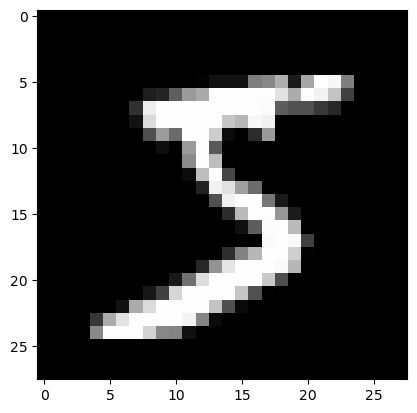

In [ ]:
# Display one of the images
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")
plt.show()

In [ ]:
# Reshaping the data from 3D to 4D for compatibility with Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# Normalizing the data to facilitate learning
import numpy as np

x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [ ]:
# Building the convolutional neural network model
model = Sequential()
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [ ]:
# Compiling the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                        

In [ ]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2096 - accuracy: 0.9375 - val_loss: 0.0793 - val_accuracy: 0.9749
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0820 - accuracy: 0.9748 - val_loss: 0.0743 - val_accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0577 - accuracy: 0.9822 - val_loss: 0.0496 - val_accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0432 - accuracy: 0.9858 - val_loss: 0.0439 - val_accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.0549 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0494 - val_accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.0563 - va

In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0643 - accuracy: 0.9851


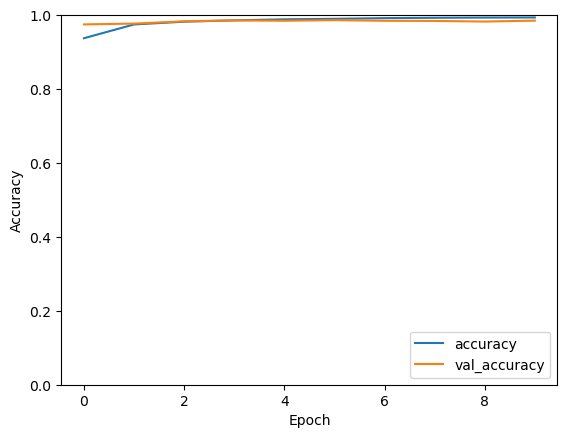

In [ ]:
# Graphical representation of the training history
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

In [ ]:
# save the model
model.save("mnist.h5")

1/1 [==============================] - 0s 97ms/step
Predicted digit: 3


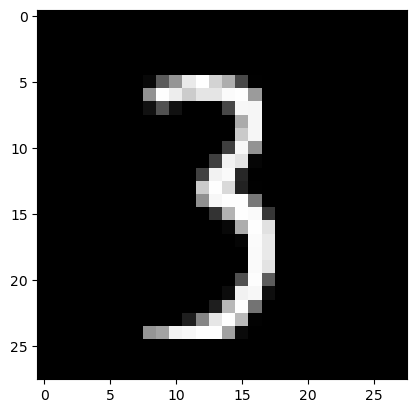

In [ ]:
# load the model and predict
from keras.models import load_model

model = load_model("mnist.h5")

i = np.random.randint(0, x_test.shape[0])

prediction = model.predict(x_test[i].reshape(1, 28, 28, 1))
print("Predicted digit:", np.argmax(prediction))

plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.show()

1/1 [==============================] - 0s 66ms/step
Predicted digit: 1


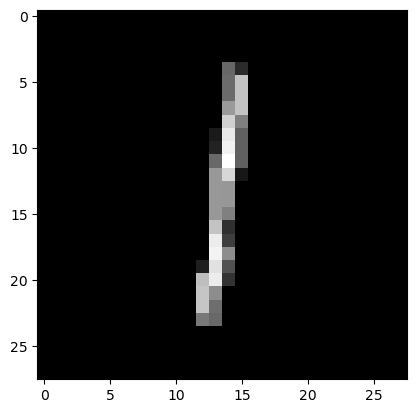

In [ ]:
# load the model and predict
from keras.models import load_model

model = load_model("mnist.h5")

i = np.random.randint(0, x_test.shape[0])

prediction = model.predict(x_test[i].reshape(1, 28, 28, 1))
print("Predicted digit:", np.argmax(prediction))

plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.show()

1/1 [==============================] - 0s 80ms/step
Predicted digit: 0


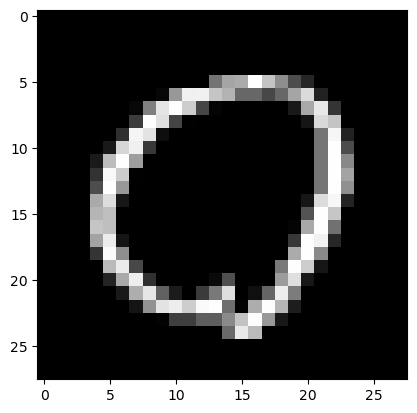

In [ ]:
# load the model and predict
from keras.models import load_model

model = load_model("mnist.h5")

i = np.random.randint(0, x_test.shape[0])

prediction = model.predict(x_test[i].reshape(1, 28, 28, 1))
print("Predicted digit:", np.argmax(prediction))

plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.show()

1/1 [==============================] - 0s 80ms/step
Predicted digit: 7


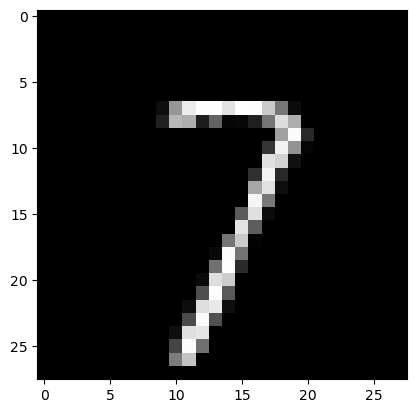

In [ ]:
# load the model and predict
from keras.models import load_model

model = load_model("mnist.h5")

i = np.random.randint(0, x_test.shape[0])

prediction = model.predict(x_test[i].reshape(1, 28, 28, 1))
print("Predicted digit:", np.argmax(prediction))

plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.show()